<div style="text-align: right"> 

### DATA 22100 - Introduction to Machine Learning

</div>

<img src="https://github.com/david-biron/DATA221imgs/blob/main/UChicago_DSI.png?raw=true" align="right" alt="UC-DSI" width="300">



<center> 

# The Convolutional AutoEncoder
    
<br/>
    
</center> 

    

### Convolution  (discrete) 

#### 1d

* Flip the kernel 
* Slide the (flipped kernel) 
* Sum the product (at every point)

<!-- 
![1d Convolution](https://raw.githubusercontent.com/david-biron/DATA221imgs/main/Convolution_discrete_1d.gif)
--> 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/Convolution_discrete_1d.gif" width="450">

For more details: 
[![But what is convolution?](https://img.youtube.com/vi/KuXjwB4LzSA/1.jpg)](https://youtu.be/KuXjwB4LzSA?si=jaQAS0_fpCLRO30m&t=129)

<br> 
<br> 
<br> 


#### 2d

|   |   |
|:-:|:-:|
| <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/TwoDconvolution.png" width="500"> | <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/Convolution_discrete_2d.gif" width="450"> | 

[//]: # "![2d Concolution II](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ulfFYH5HbWpLTIfuebj5mQ.gif)"

<br>

|   |   |
|:--|:--|
| <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/icon_example.png" width="50" height=""> | Consider the following kernel:  $ \ \left[ \begin{array}{ccc}  1/9 & 1/9 & 1/9 \\  1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9  \end{array} \right] \ $ . <br> When applied to an image, it will average each pixel with its neighbors and therefore **blur** the image. |

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/ConvolutionBlurExample.png" width="500"> 

|   |   |
|:--|:--|
| <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/icon_example.png" width="50" height=""> | Consider the following kernel:  $ \ \left[ \begin{array}{ccc}  0 & 1 & 0 \\  0 & 1 & 0 \\ 0 & 1 & 0  \end{array} \right] \ $ . <br> When applied to an image, it will produce a large input (activate <br> the downstream neuron) when it **coincides with a vertical line**. <br> The downstream layer of neurons will **map vertical lines**. |

<br> 

|   |   |
|:--|:--|
| <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/icon_example.png" width="50" height=""> | Consider the following kernel:  $ \ \left[ \begin{array}{ccc}  0 & 0 & 0 \\  1 & 1 & 1 \\ 0 & 0 & 0  \end{array} \right] \ $ . <br> When applied to an image, it will produce a large input (activate <br> the downstream neuron) when it **coincides with a horizontal line**. <br> The downstream layer of neurons will **map horizontal lines**. |



#### More generally

* The filters are determined by the weights (here, each 'filter' is composed of three weigths) 

* Each filter is **covolved** with layer of neurons by repeating it while shifting it one position at a time. 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/ConvolutionalNetworkArchitecture.png" width="600">



### Why design a Neural Network Convolutional filters? 

* With high-dimensional inputs fully connected layers become impractical. Local connectivity, i.e., connecting each neuron to a local region of the inputs, is manageable. The extent of this connectivity is a hyperparameter called the receptive field of the neuron or simply the 'filter size'. 

* Filters in 'early' layers of CNNs learn low level features (e.g., horizontal or vertical edges). <br/> These are stacked such that filters in 'late' layers learn abstract shapes in their last layers. 

* Given sufficient data, CNNs **can learn** to be insensitive to translation (shifts), rotation, and scaling. I.e., a CNN can learn **filters** that 'fire' when a pattern is presented at different positions, orientations, or sizes.

$\rightarrow$ They can make powerful image classifiers.



<br> 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/ConvolutionalNetworkCar.jpeg" width="600">

<br> 


In [1]:
!pip3 install torchvision==0.14.1
!pip3 install torch==1.13.1 



In [2]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST, FashionMNIST
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import colormaps
plt.style.use('fivethirtyeight')



In [3]:
####################################################################
# Set up using torchvision.transforms for preprocessing each image #   
####################################################################

img_transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]) # instead of greyscale values between 0..255
])

################################################
#        Load data from a local folder         #
#   (some sources have naming discrepancies)   #
################################################

# mndata = MNIST('data/MNIST', transform=img_transform, download=True)
mndata = FashionMNIST('data/Fashion-MNIST', transform=img_transform, download=True)
img_side = 28
n_mnist_pixels = img_side*img_side


#### Technical note: 

torch.nn.ConvTranspose2d, also known as 'deconvolution' (although it is not a true inverse of convolution), upsamples the input layer. 

<br> 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/Deconvolution_Image1.jpeg" width="400">

[Initial and deconvolved images of fixed cells.](https://www.photometrics.com/learn/spinning-disk-confocal-microscopy/image-restoration-through-deconvolution) <br> Blue is a nuclear localization signal, green indicates microtubules and red actin filaments. <br> Deconvolution 'assumes' the original image is blurred with a filter (of sorts) and works out what an unblurred image might look like. 



<br> 
<br> 
<br> 

Try this with a grayscale image of your choice:  


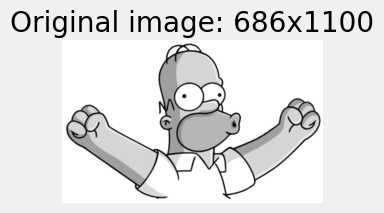

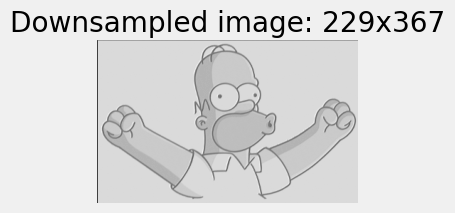

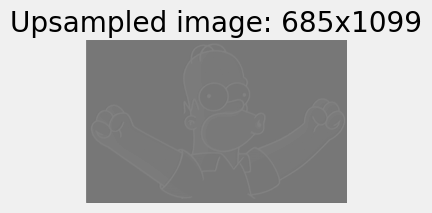

In [4]:
import matplotlib.image as mpim

##################################
# Load your image of choice here #
##################################

img = mpim.imread('Homer.png')
img_2d_array = img[:,:,0] # keep a 2d array of pixel values

##################################

def img_show(img, ttl): 
    img_2d_array = img.squeeze().detach().numpy()
    plt.figure(figsize=(3, 5))
    plt.imshow(img_2d_array, cmap='gray') 
    plt.axis('off')
    plt.grid(False)
    plt.title(ttl+' image: %dx%d'%img_2d_array.shape)

# Original image
rows, cols = img_2d_array.shape
img = torch.tensor(img_2d_array).view(1,1,rows,cols)
img_show(img, 'Original')

# Downsample image
downsample = torch.nn.Conv2d(1, 1, 3, stride=3, padding=1)
img = downsample(img)
img_show(img, 'Downsampled')

# Upsample (downsampled) image
upsample = torch.nn.ConvTranspose2d(1, 1, 3, stride=3, padding=1)
img = upsample(img)
#normalize = transforms.Normalize([0.5], [0.5])
#img_show(normalize(img), 'Upsampled')
img_show(img, 'Upsampled')



<br/> 

(Loosely analogous to erosion and dilation filters in image processing, if you will)


<br/> 


### Build the Convolutional AutoEncoder class

#### Design considerations (the tip of the iceberg) 

The number of filters, layers (convolutional/pooling/linear) in the model depends on 

* The complexity of the problem
* The size of the input data
* Computational feasibility 
* Known architectures (don't start designing without looking at what others might have done)  

Deeper and wider CNNs can potentially learn more complex patterns but may be prone to overfitting. 

One way to go about it is to strat simple and increase complexity as necessary. 

Overfitting is avoided using the usual ideas:
* **Regularization**: some optimizers have a `weight_decay` parameter that implements L2 regularization. You can also manually add a regularization term to your loss...  
* **Dropout**: drop some random nodes in your network layers. See [`torch.nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
* **Early stopping**: monitor the training and testing losses. 



In [12]:
########################################################
#  Create an Convolutional AutoEncoder class (model)  #
########################################################

# Dimensions:
#------------
# Conv2d, kernel=3, padding=1: 28 x 28 -> 28 x 28 (because of padding)
# MaxPool2d, kernel=2: 28x28 -> 14x14
# Conv2d, kernel=3, padding=1: 14 x 14 -> 14 x 14 (because of padding)
# MaxPool2d, kernel=2: 28x28 -> 7x7
#
# Thus: 
#
# 8 latent channels, each 7x7 pixels

class CAE(torch.nn.Module):    
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=16, 
                            kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(in_channels=16, out_channels=8, 
                            kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(in_channels=8, out_channels=16, 
                                     kernel_size=3, stride=2, 
                                     padding=1, 
                                     output_padding=1),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(in_channels=16, out_channels=1, 
                                     kernel_size=3, stride=2, 
                                     padding=1, 
                                     output_padding=1),
            torch.nn.Sigmoid()
        )
         
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


#### Crreat the model 

* Create an instance of the model 
* Set the learning rate
* Set the loss function
* Set the optimizer 
* Set the batch size and number of epochs

In [13]:
########################################################
#       Create an instance of the CAE model and        #
# initialize it with a loss function and an optimizer  # 
#######################################################

num_epochs = 3   
batch_size = 128 # speeds things up 
learning_rate = 2e-3

# Model Initialization
model = CAE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an AdamW Optimizer with learning rate = lr 
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)



#### To confirm the dimensions of the latent filters and the reconstructed image: 

num_samples = 1 # limit the number of samples 
dataloader = DataLoader(mndata, batch_size=10, shuffle=True)
for data,sample in zip(dataloader, range(num_samples)):
    image, labels = data
    latent, reconstructed = model(image)
    print(image.shape, '-->', latent.shape)
    print('                            -->', reconstructed.shape)



#### Train the model 

* For each epoch 
    * For each data batch
        * Run the forward pass
        * Calculate the loss
        * Run the backward pass
        * Update the weights (optimizer step)
        * Zero the gradient

<br/> 

* Also, for looking at later: 
    * Keep a pre-training image, random latent filters, and 'reconstruction'
    * After every epoch: keep an image, current latent filters, and reconstruction 
    * Keep a list of the losses for plotting  

In [14]:
####################################
#       Train the CAE model        #
####################################

dataloader = DataLoader(mndata, batch_size=batch_size, shuffle=True)

epochs = num_epochs
outputs = []
losses = []
first = True
for epoch in range(epochs):
    for data in dataloader:
        image, labels = data

        latent, reconstructed = model(image) # input and output - 
                                             # entire batch

        loss = loss_function(reconstructed, image)

        # the gradient is computed and stored.
        # .step() performs parameter update.
        # And... zero the gradients
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # 


        losses.append(loss)        
        if first:
            outputs.append((-1, image, latent, reconstructed))
            print('Before training: Loss=%.4f'%loss)
            first = False
        
    outputs.append((epoch, image, latent, reconstructed))
    print('After epoch %d: Loss=%.4f'%(epoch, loss))
    



Before training: Loss=1.4760
After epoch 0: Loss=0.5943
After epoch 1: Loss=0.5770
After epoch 2: Loss=0.5994


#### Plot the losses (with a little smoothing)

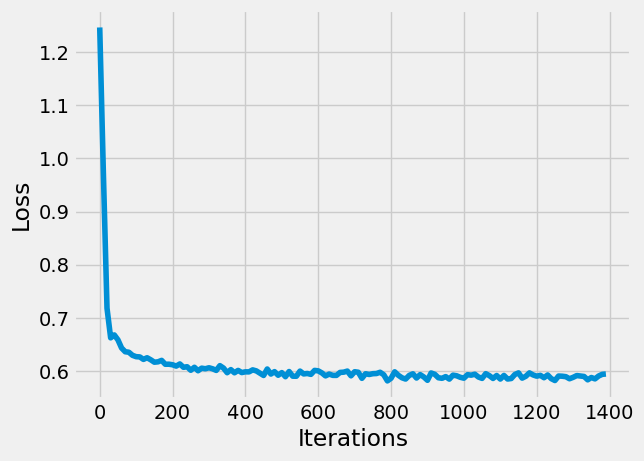

In [8]:
##########################
# Plot (smoothed) losses #
##########################

win = 10

# remove the computational graph from each tensor
losses_values = [x.detach().numpy() for x in losses]  

# rolling window average
losses_values = \
    np.convolve(losses_values, np.ones(win), 'valid') / win 

iters = np.array(range(len(losses_values)))
losses_values = losses_values[::win]
iters = iters[::win] 

plt.figure()
plt.plot(iters, losses_values) 
plt.xlabel('Iterations')
plt.ylabel('Loss');



#### Show reconstruction pre- and post-training 

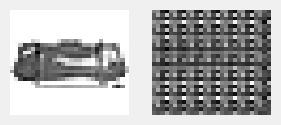

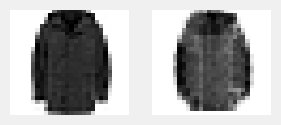

In [9]:
################################################
# Show a reconstruction of the untrained AE... #
################################################

def plot_rnd_img_and_reconstruction(outputs, outputs_idx):
    '''
    Plot a random image and its reconstruction from 
    outputs[outputs_idx]. 
    Input: an index in outputs. 
           The first item in outputs corresponds to the first 
           batch before training.  
           Every subsequent item corresponds to the last batch 
           after the corresponding training epoch. 
    '''
    max_idx = outputs[outputs_idx][1].shape[0]
    rnd_img_num = np.random.randint(0, max_idx) # last batch is 
                               # likely smaller than batch_size

    plt.figure(figsize=(3,1.3))
    plt.subplot(1, 2, 1)
    
    # outputs_idx output, 2nd item in the tuple, rnd image
    image = outputs[outputs_idx][1][rnd_img_num].detach().numpy() 
    
    plt.imshow(image.reshape(28,28), 
               aspect = 'auto', cmap = cm.binary)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    
    # outputs_idx output, 4th item in the tuple, rnd image
    reconstructed=outputs[outputs_idx][3][rnd_img_num].detach().numpy() 
    
    plt.imshow(reconstructed.reshape(28,28), 
               aspect = 'auto', cmap = cm.binary)
    plt.axis('off')
    plt.show()

plot_rnd_img_and_reconstruction(outputs, 0) 

#############################################
# ...and a reconstruction of the trained AE #
#############################################

plot_rnd_img_and_reconstruction(outputs, -1) 



#### Can we make sense of the latent features? 

(Sometimes, here - perhaps not) 

In [15]:
# Each output is a tuple containing:
#    epoch number (-1 for before training) 
#    image (tensor)
#    latent
#    reconstructed image (tensor)

# To a latent feature: 
outputs_idx = 0 # first output (pre-training)
rnd_img_num = 1 # second image (arbitrary choice) 
outputs[outputs_idx][2][rnd_img_num].detach().numpy().shape # latent
latents = outputs[outputs_idx][2][rnd_img_num].detach().numpy()
latents[0] # first latent feature (arbitrary choice) 

array([[0.14155278, 0.12386765, 0.15227702, 0.05969734, 0.15967065,
        0.33651292, 0.25393623],
       [0.2674773 , 0.15077516, 0.14172852, 0.09468845, 0.11071956,
        0.19861346, 0.19556332],
       [0.29326442, 0.05175393, 0.05943763, 0.05551966, 0.07861979,
        0.22557963, 0.266869  ],
       [0.32803455, 0.05410262, 0.04769281, 0.03408105, 0.12909566,
        0.19383876, 0.28492677],
       [0.33341286, 0.19076647, 0.07985909, 0.02632194, 0.15939248,
        0.20711128, 0.28088334],
       [0.26424652, 0.26603097, 0.03082906, 0.04828044, 0.24391237,
        0.1353088 , 0.29423472],
       [0.26419434, 0.34236237, 0.2835066 , 0.28239134, 0.40518004,
        0.20109184, 0.3441007 ]], dtype=float32)

(8, 7, 7)


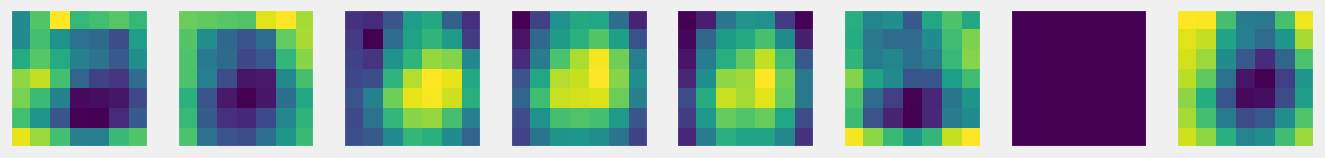

In [16]:
outputs_idx = num_epochs  # num_epochs+1 outputs were saved 
                          # (before training and after each epoch)                
rnd_img_num = 11 # arbitrary choice

# Each output is a tuple containing:
#    epoch number (-1 for before training) 
#    image (tensor)
#    latent
#    reconstructed image (tensor)

latents = outputs[outputs_idx][2].detach().numpy()
mean_latents = latents.mean(axis=0) 
print(mean_latents.shape)
fig = plt.figure(figsize=(15, 2))
for idx in np.arange(8):
    ax = fig.add_subplot(1, 8, idx+1, xticks=[], yticks=[])
    plt.imshow(mean_latents[idx])
    

#### We could average latent filters for various images 

(Haven't played with it sufficiently to arrive at a conclusion) 

<br/> 



### Latent features (in more complicated architectures) 

#### Sometimes the latent featurtes can make sense 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/CNN_latents_faces.png" width="500">

* An eye is made up of edges/curves 
* A face is made up of two eyes

<br>
<br>

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/CNN_latents_Volvo.png" width="600">

* Edges
* Small typical features
* More complex typical features 
* Volvo

<br> 
<br> 



* Moving the latent vector in a certain direction (in the latent space) can change an attribute in the output image.
<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/StyleGAN_Faces.png" width="500">

<br> 

See also [ThisPersonDoesNotExist](https://thispersondoesnotexist.com) where a fake face gets generated every time you refresh the page...

<br> 
<br> 
<br> 


(A similar phenomenon happens with [word embedding](https://en.wikipedia.org/wiki/Word_embedding))

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/SimpleWordEmbeddingExample.png" width="550"> 

<br> 


* Each word has three coordinate values: age, gender, and royalty. 
* Each word is represented by a **feature vector**. 
* The directions in feature space have semantic meaning (learned from considering the words in textual contexts). 


<br> 